# Lettuce Challenge
## Image Exploration

In [2]:
import os
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
# Let's load an image
cwd = os.getcwd()
rgb_path = os.path.join(cwd,'images', 'rgb','RGB_1.png' )

rgb_img = Image.open(rgb_path)


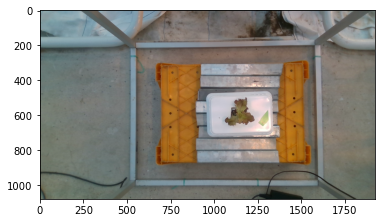

In [27]:
# Example rgb image
plt.imshow(rgb_img)
plt.show()

In [21]:
# Let's check the depth image
depth_path = os.path.join(cwd,'images', 'depth','Debth_1.png' )

depth_img = Image.open(depth_path)

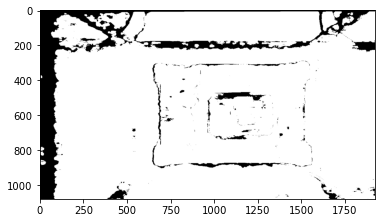

In [22]:
# Example depth image
plt.imshow(depth_img)
plt.show()

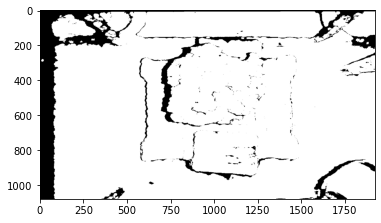

In [24]:
# Depth image looks like a promising path to reduce the image size to focus on the key features.

# Lets try a larger lettuce as well
depth_img_lrg = Image.open(os.path.join(cwd,'images', 'depth','Debth_346.png' ))

plt.imshow(depth_img_lrg)
plt.show()

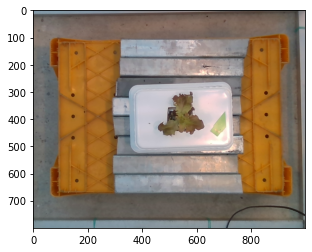

In [30]:
# A little bit trickier, because the lettuce extends over the crate. Lets look at different options for cropping

rgb_img_cropped = rgb_img.crop((600, 200, 1600, 1000))
plt.imshow(rgb_img_cropped)
plt.show()

In [4]:
import pandas as pd

image_info = pd.read_json(os.path.join(cwd,'images', 'labels_latest.json' ))

In [7]:
image_info.head()

,General,Measurements
ExperimentInfo,This dataset contains references to images and...,NaN
Varieties,"Aphylion, Salanova, Satine, Lugano, but in thi...",NaN
Measurements,{'RGBImage': {'Info': 'Reference to a png-file...,NaN
Camera,{'Info': 'All images are obtained with a reals...,NaN
Image27,NaN,"{'Variety': 'Lugano', 'RGBImage': 'RGB_27.png'..."


In [8]:
import json

In [12]:
# Open json file with all feature and target information
with open(os.path.join(cwd,'images', 'labels_latest.json' ), 'r') as f:
    image_info2 = json.loads(f.read())


In [18]:
# Confirm success
print(image_info2['Measurements'].keys())

dict_keys(['Image27', 'Image79', 'Image140', 'Image203', 'Image292', 'Image38', 'Image97', 'Image157', 'Image218', 'Image317', 'Image47', 'Image48', 'Image49', 'Image50', 'Image52', 'Image53', 'Image100', 'Image101', 'Image104', 'Image107', 'Image108', 'Image109', 'Image110', 'Image111', 'Image112', 'Image113', 'Image114', 'Image115', 'Image164', 'Image165', 'Image166', 'Image167', 'Image168', 'Image170', 'Image173', 'Image174', 'Image177', 'Image178', 'Image219', 'Image222', 'Image223', 'Image224', 'Image225', 'Image226', 'Image227', 'Image228', 'Image262', 'Image263', 'Image264', 'Image267', 'Image269', 'Image270', 'Image271', 'Image272', 'Image346', 'Image347', 'Image348', 'Image353', 'Image354', 'Image356', 'Image22', 'Image24', 'Image25', 'Image26', 'Image28', 'Image68', 'Image69', 'Image70', 'Image72', 'Image73', 'Image76', 'Image77', 'Image78', 'Image80', 'Image83', 'Image132', 'Image133', 'Image135', 'Image136', 'Image137', 'Image138', 'Image139', 'Image141', 'Image142', 'Image

In [22]:
# Check there are no duplicates
if len(image_info2['Measurements'].keys()) == len(set(image_info2['Measurements'].keys())):
    print('NO DUPLICATES!')
else:
    print('We are screwed...')

NO DUPLICATES!


In [24]:
image_list = image_info2['Measurements'].keys()

for image in image_list:
    
    print(image_info2['Measurements'][image])
    break


{'Variety': 'Lugano', 'RGBImage': 'RGB_27.png', 'DebthInformation': 'Debth_27.png', 'FreshWeightShoot': 5.5, 'DryWeightShoot': 0.42, 'Height': 9.0, 'Diameter': 11.0, 'LeafArea': 153.9}


In [26]:
data = pd.DataFrame(image_info2['Measurements'])
data.head()

,Image27,Image79,Image140,Image203,Image292,Image38,Image97,Image157,Image218,Image317,...,Image1,Image125,Image229,Image365,Image375,Image10,Image93,Image162,Image258,Image322
Variety,Lugano,Lugano,Lugano,Lugano,Lugano,Salanova,Salanova,Salanova,Salanova,Salanova,...,Satine,Satine,Satine,Satine,Satine,Salanova,Salanova,Salanova,Salanova,Salanova
RGBImage,RGB_27.png,RGB_79.png,RGB_140.png,RGB_203.png,RGB_292.png,RGB_38.png,RGB_97.png,RGB_157.png,RGB_218.png,RGB_317.png,...,RGB_1.png,RGB_125.png,RGB_229.png,RGB_365.png,RGB_375.png,RGB_10.png,RGB_93.png,RGB_162.png,RGB_258.png,RGB_322.png
DebthInformation,Debth_27.png,Debth_79.png,Debth_140.png,Debth_203.png,Debth_292.png,Debth_38.png,Debth_97.png,Debth_157.png,Debth_218.png,Debth_317.png,...,Debth_1.png,Debth_125.png,Debth_229.png,Debth_365.png,Debth_375.png,Debth_10.png,Debth_93.png,Debth_162.png,Debth_258.png,Debth_322.png
FreshWeightShoot,5.5,30.3,60.9,112.0,372.6,4.7,18.6,47.1,96.0,187.4,...,2.6,22.3,71.0,165.5,251.9,1.4,17.0,60.4,145.4,227.8
DryWeightShoot,0.42,1.92,2.83,5.76,14.17,0.49,1.62,2.59,4.81,8.76,...,0.14,1.36,3.69,7.22,10.97,0.09,1.24,3.71,7.63,11.63
